# <head> Project 2: Exploratory Data Analysis of World Development Statistics </head>
# <subhead> Erin De Pree, Ph.D. </subhead>

## Problem Statement

We will look at each country's life expectancy and GNI per capita over time to determine under- and over-achievers in these categories.  Then we will use the data to attempt to determine the proper regional affliation for countries whose regional affliation varies by world leaders, UN, World Bank, etc.  Perhaps our data can help answer this question for some countries.

### Disclaimer

I will be using the term "country" to refer to the entities in this report with the understanding that not everyone agrees on this classification.  No official recognition or non-recognition is implied by an entity's inclusion or exclusion in this report.  The author lacks the necessary knowledge and training to make any informed statements in this matter.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import math
import seaborn as sns

## Set up

Much of the data appears in strings instead of numbers.  These are written as `43k` for `43_000` and `3.2M` for `3_200_000` and even `1.3B` for `1_300_000_000`.  Here's a  useful function to translate these strings to numbers for future calculations.

In [3]:
def str_to_num(in_str):
    '''
    Converts strings to numbers in scientific notation: a * 10**n
    ---
    in_str: incoming string of the from '10k' (10_000) or 4.3B (4_300_000_000)
    '''
    mag = in_str[-1]
    if in_str == 'nan':
        a = 0
        n = 0
    elif mag in '0123456789':
        a = float(in_str)
        n = 0
    elif mag == 'k':
        a = float(in_str[:-1])
        n = 3
    elif mag == 'M':
        a = float(in_str[:-1])
        n = 6
    elif mag == 'B':
        a = float(in_str[:-1])
        n = 9
    
    return a * (10**n)

In [4]:
help(str_to_num)

Help on function str_to_num in module __main__:

str_to_num(in_str)
    Converts strings to numbers in scientific notation: a * 10**n
    ---
    in_str: incoming string of the from '10k' (10_000) or 4.3B (4_300_000_000)



## Population

First I'm going to look at the population data.  Although I did clean this data and looked at it, it will not play a role in my final analysis.

In [5]:
pop = pd.read_csv('../data/population.csv')

pop.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,3.28M,...,108M,108M,109M,109M,109M,110M,110M,110M,111M,111M
1,Angola,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,1.57M,...,125M,126M,127M,128M,129M,130M,131M,131M,132M,133M
2,Albania,400k,402k,404k,405k,407k,409k,411k,413k,414k,...,1.35M,1.32M,1.29M,1.26M,1.23M,1.21M,1.18M,1.15M,1.12M,1.1M
3,Andorra,2650,2650,2650,2650,2650,2650,2650,2650,2650,...,62.5k,62.2k,61.9k,61.7k,61.4k,61.2k,60.9k,60.7k,60.5k,60.2k
4,United Arab Emirates,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,40.2k,...,13.5M,13.5M,13.6M,13.7M,13.8M,13.8M,13.9M,14M,14M,14.1M


Let's see what's going on with the data.

In [6]:
pop.dtypes

country    object
1800       object
1801       object
1802       object
1803       object
            ...  
2096       object
2097       object
2098       object
2099       object
2100       object
Length: 302, dtype: object

Very annoying.  The numbers are objects, this needs some cleaning.

In [7]:
pop.isnull().sum()

country    0
1800       0
1801       0
1802       0
1803       0
          ..
2096       1
2097       1
2098       1
2099       1
2100       1
Length: 302, dtype: int64

In [8]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Columns: 302 entries, country to 2100
dtypes: object(302)
memory usage: 464.9+ KB


Population contains a list of 198 countries, each with populations from 1800 to 2100.  Clearly at least the last 75 years are predictions and not data.  I'm going to treat it all the same.  

In [9]:
# number of missing data entries
pop.isnull().sum().sum()

100

There are 100 missing entries somewhere.

### World Population

In [10]:
pop['1895'].apply(str_to_num).sum()

1571021125.0

In [11]:
popworld = []

for year in range(1800,2101):
    popworld.append(float(pop[str(year)].fillna('0').apply(str_to_num).sum()/10**9))

pop_world = pd.DataFrame(popworld, index=[*range(1800,2101)], columns = ['World'])

In [12]:
pop_world.head()

,World
1800,0.984455
1801,0.987895
1802,0.991555
1803,0.994954
1804,0.997486


In [13]:
pop_world.tail()

,World
2096,10.381911
2097,10.370037
2098,10.355924
2099,10.353491
2100,10.340875


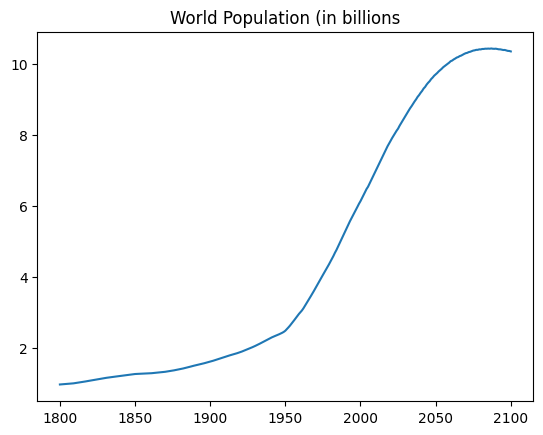

In [14]:
fig, ax = plt.subplots()

plt.plot(pop_world['World'])

ax.set_title('World Population (in billions');

fig.savefig('../images/world_population.png')

plt.show()
plt.close(fig)

Very cool, I'm please to see the world population look as expected

### Population by Country Over Time

I know how to plot columns of data with the year as the index, so I'm going to transpose this data into that form.

In [15]:
pop_country = pop.set_index('country').T

pop_country.head()

country,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,...,Uzbekistan,St. Vincent and the Grenadines,Venezuela,Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
1800,3.28M,1.57M,400k,2650,40.2k,534k,413k,37k,200k,3M,...,1.92M,25.8k,1M,4M,27.8k,47.3k,2.59M,1.45M,747k,1.09M
1801,3.28M,1.57M,402k,2650,40.2k,520k,413k,37k,205k,3.02M,...,1.92M,25.8k,978k,4.1M,27.8k,47.3k,2.59M,1.45M,758k,1.09M
1802,3.28M,1.57M,404k,2650,40.2k,506k,413k,37k,211k,3.04M,...,1.92M,25.8k,957k,4.2M,27.8k,47.3k,2.59M,1.46M,770k,1.09M
1803,3.28M,1.57M,405k,2650,40.2k,492k,413k,37k,216k,3.05M,...,1.92M,25.8k,936k,4.31M,27.8k,47.3k,2.59M,1.46M,782k,1.09M
1804,3.28M,1.57M,407k,2650,40.2k,479k,413k,37k,222k,3.07M,...,1.92M,25.8k,916k,4.41M,27.8k,47.3k,2.59M,1.47M,794k,1.09M


### Missing Data

In [16]:
pop_country.isnull().sum().sum()

100

there are 100 missing entries, not too many (all considered)

In [17]:
with pd.option_context('display.max_rows',None):
    print(pop_country.isnull().sum())

country
Afghanistan                         0
Angola                              0
Albania                             0
Andorra                             0
United Arab Emirates                0
Argentina                           0
Armenia                             0
Antigua and Barbuda                 0
Australia                           0
Austria                             0
Azerbaijan                          0
Burundi                             0
Belgium                             0
Benin                               0
Burkina Faso                        0
Bangladesh                          0
Bulgaria                            0
Bahrain                             0
Bahamas                             0
Bosnia and Herzegovina              0
Belarus                             0
Belize                              0
Bolivia                             0
Brazil                              0
Barbados                            0
Brunei                              0
Bhut

All 100 hundred of these entries are from the Holy See (or Vatican City).  I'm going to remove it from the set of countries to continue studying.

In [18]:
countries_pop = pop_country.columns.tolist()

In [19]:
countries_pop.remove('Holy See')

In [20]:
print(countries_pop)

['Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hong Kong, China', 'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indon

In [21]:
len(countries_pop)

196

We have 196 countries with complete population data

### Continuing with Country Population over Time

In [22]:
def pop_time(c):
    '''
    returns a country's population over time as a pandas Series of floats
    ---
    c : country, string
    '''
    return pop_country[c].apply(str_to_num)

In [23]:
pop_time('Mexico')

1800      5100000.0
1801      5170000.0
1802      5230000.0
1803      5300000.0
1804      5370000.0
           ...     
2096    119000000.0
2097    118000000.0
2098    117000000.0
2099    117000000.0
2100    116000000.0
Name: Mexico, Length: 301, dtype: float64

In [24]:
type(pop_time('Mexico'))

pandas.core.series.Series

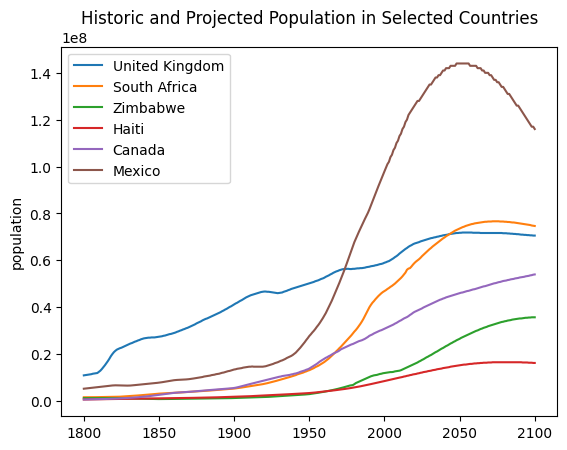

In [25]:
fig,ax= plt.subplots()

pop_time('United Kingdom').plot(ylabel='population', title = 'Historic and Projected Population in Selected Countries', legend=True)
pop_time('South Africa').plot(legend=True)
pop_time('Zimbabwe').plot(legend=True)
pop_time('Haiti').plot(legend=True)
pop_time('Canada').plot(legend=True)
pop_time('Mexico').plot(legend=True);

fig.savefig('../images/population.png')

plt.show()
plt.close(fig)

The overall process is working and we can plot a country's population over time.

## Life Expectancy

Next let's look at the life expectancy data.

In [26]:
life_expect = pd.read_csv('../data/life_expectancy.csv')
le = life_expect.set_index('country').T

le

country,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,...,Uzbekistan,St. Vincent and the Grenadines,Venezuela,Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
1800,28.2,27.0,35.4,NaN,30.7,33.2,34.0,33.5,34.0,34.4,...,26.9,26.0,32.2,32.0,24.3,25.4,23.4,33.5,32.6,33.7
1801,28.2,27.0,35.4,NaN,30.7,33.2,34.0,33.5,34.0,34.4,...,26.9,26.0,32.2,32.0,24.3,25.4,23.4,33.5,32.6,33.7
1802,28.2,27.0,35.4,NaN,30.7,33.2,34.0,33.5,34.0,34.4,...,26.9,26.0,32.2,32.0,24.3,25.4,23.4,33.5,32.6,33.7
1803,28.2,27.0,35.4,NaN,30.7,33.2,34.0,33.5,34.0,34.4,...,26.9,26.0,32.2,32.0,24.3,25.4,23.4,33.5,32.6,33.7
1804,28.2,27.0,35.4,NaN,30.7,33.2,34.0,33.5,34.0,34.4,...,26.9,26.0,32.2,32.0,24.3,25.4,23.4,33.5,32.6,33.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,76.2,79.5,87.9,NaN,82.9,86.8,85.7,85.5,91.8,91.6,...,77.0,83.0,86.8,84.6,74.6,80.4,77.5,77.1,76.5,73.9
2097,76.4,79.6,88.0,NaN,83.0,86.9,85.8,85.6,91.9,91.7,...,77.1,83.1,86.9,84.7,74.7,80.5,77.6,77.3,76.7,74.0
2098,76.5,79.7,88.2,NaN,83.1,87.0,86.0,85.7,92.0,91.8,...,77.2,83.3,87.0,84.8,74.8,80.6,77.8,77.4,76.8,74.2
2099,76.6,79.9,88.3,NaN,83.2,87.1,86.1,85.8,92.1,91.9,...,77.3,83.4,87.2,84.9,74.9,80.7,77.9,77.5,77.0,74.3


### Missing Data

In [27]:
le.isnull().sum().sum()

2079

There are 2079 entries missing.  This may seem like a lot but we have a total of $301 \times 195 = 58,695$ potential entries.  So this is really about $3.5\%$ of the maximum dataset.  Not so bad.  Let's figure out where this missing data is.

In [28]:
with pd.option_context('display.max_rows', None):
    print(le.count())

country
Afghanistan                       301
Angola                            301
Albania                           301
Andorra                            70
United Arab Emirates              301
Argentina                         301
Armenia                           301
Antigua and Barbuda               301
Australia                         301
Austria                           301
Azerbaijan                        301
Burundi                           301
Belgium                           301
Benin                             301
Burkina Faso                      301
Bangladesh                        301
Bulgaria                          301
Bahrain                           301
Bahamas                           301
Bosnia and Herzegovina            301
Belarus                           301
Belize                            301
Bolivia                           301
Brazil                            301
Barbados                          301
Brunei                            301
Bhut

There are nine countries with significantly shorter datasets.  They are:

In [29]:
le_short_data=[c for c in le.columns.tolist() if le[c].count()<301]

print(le_short_data)
print(len(le_short_data))

['Andorra', 'Dominica', 'St. Kitts and Nevis', 'Monaco', 'Marshall Islands', 'Nauru', 'Palau', 'San Marino', 'Tuvalu']
9


In [30]:
with pd.option_context('display.max_rows', None):
    print(le[le_short_data])

country  Andorra  Dominica  St. Kitts and Nevis  Monaco  Marshall Islands  \
1800         NaN       NaN                  NaN     NaN               NaN   
1801         NaN       NaN                  NaN     NaN               NaN   
1802         NaN       NaN                  NaN     NaN               NaN   
1803         NaN       NaN                  NaN     NaN               NaN   
1804         NaN       NaN                  NaN     NaN               NaN   
1805         NaN       NaN                  NaN     NaN               NaN   
1806         NaN       NaN                  NaN     NaN               NaN   
1807         NaN       NaN                  NaN     NaN               NaN   
1808         NaN       NaN                  NaN     NaN               NaN   
1809         NaN       NaN                  NaN     NaN               NaN   
1810         NaN       NaN                  NaN     NaN               NaN   
1811         NaN       NaN                  NaN     NaN               NaN   

A quick discussion of the countries in question

#### European Microstates
* __Andorra__ located between France and Spain with about 90,000 people
* __Monaco__  south of France on the Mediterrean Sea, approximately 39,000 people
* __San Marino__ in central Italy with around 34,000 people

#### Caribbean Islands
* __Dominica__ is an island in the Lesser Antilles archipelago (these islands are in the eastern Caribbean and beginning with the Virgin Islands (just east of Puetro Rico) and down through the Staint Kitts and Nevis, Dominica, ending with Trindad and Tobago (just north of Venezuala)).  Dominica has a population of approximately 75,000.
* __St. Kitts and Nevis__ two more islands in the Lesser Antilles with a population of approximately 48,000.

#### Oceania Islands
* __Marshall Islands__ over 1,000 (mostly extremely small) islands in the northern region of Micronesia.  Population of about 43,000 lives on 24 islands and atolls.  (The Biniki Atoll, a famous site for US nuclear weapons testing, is part of the Marshall Islands.)
* __Nauru__, an island south of the Marshall Islands, Nauru has a population of around 12,000
* __Palau__, located east of Nauru and just to the west of the Philippines, is the island nation of Palau with roughly 18,000 people
* __Tuvalu__, a nation of nine islands in the Polynesian region of Oceania (the eastern most region of Oceania).  About 10,000 people live in Tuvalu which is north of Fiji


#### Data Cleaning Decision
I have chosen to leave these 9 nations out of my EDA.  I am most concerned about leaving out the Oceania nations.  The European microstates and Caribbean islands have larger nearby neighbors in with similiar histories.  The islands of Oceania are quite distant from each other.  Although there were robust trading relationships amongst the Oceanic nations prior to recorded history, they often have extremely different experiences over the last several hundread years.  My first improvement on this EDA would be to revisit these countries.  

In [31]:
countries_le = le.columns.tolist()

In [32]:
for c in le_short_data:
    countries_le.remove(c)

In [33]:
print(countries_le)

len(countries_le)

['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates', 'Argentina', 'Armenia', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hong Kong, China', 'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Indonesia', 'India', 'Irelan

186

We have 186 countries with complete life expectancy data.

### Plots of Life Expectancy

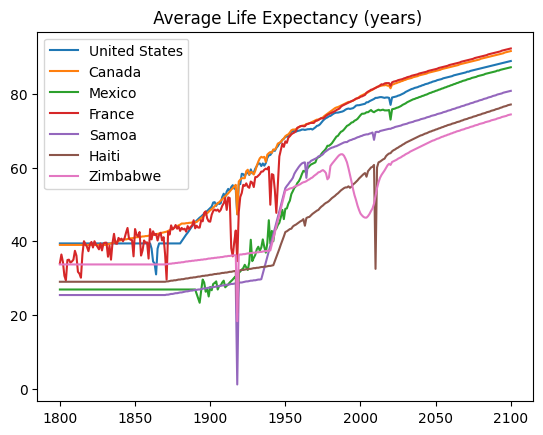

In [34]:
fig, ax= plt.subplots()

le['United States'].plot(title=' Average Life Expectancy (years)', legend = True)
le['Canada'].plot(legend= True)
le['Mexico'].plot(legend=True)
le['France'].plot(legend=True)
le['Samoa'].plot(legend=True)
le['Haiti'].plot(legend=True)
le['Zimbabwe'].plot(legend=True);

fig.savefig('../images/life_expectancy.png')

plt.show()
plt.close(fig)

Dip around 1918 is due to the 'Spanish' influenza epidemic

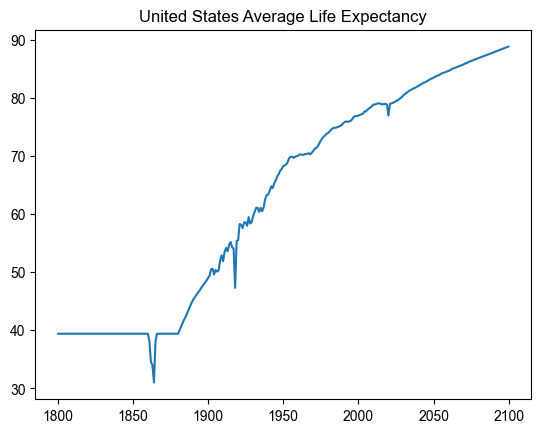

In [35]:
fig, ax = plt.subplots()

sns.set_style('ticks')
sns.lineplot(data= le['United States'], ax=ax)

ax.xaxis.set_major_locator(MultipleLocator(50,1800))

ax.set_title('United States Average Life Expectancy');
#ax.set_xlabel('Year')
ax.set_ylabel('');

plt.show()
plt.close(fig)

There's even a significant drop in life expectancy around the 1860's likely due to the Civil War.

## Gross National Income (GNI) per Capita

Finally, the gross national income (GNI) per capita.

In [36]:
gross_natl_income = pd.read_csv('../data/gni_per_cap_atlas_method_con2021.csv')
gni_s = gross_natl_income.set_index('country').T

gni_s

country,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,Azerbaijan,...,Uzbekistan,St. Vincent and the Grenadines,Venezuela,Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
1800,207.0,517.0,207.0,738.0,794.0,111.0,650.0,763.0,1940.0,33.0,...,199.0,546.0,459.0,226.0,416.0,373.0,197.0,800.0,213.0,443.0
1801,207.0,519.0,207.0,740.0,797.0,111.0,650.0,769.0,1950.0,33.0,...,199.0,546.0,457.0,226.0,417.0,373.0,198.0,791.0,214.0,444.0
1802,207.0,522.0,207.0,743.0,799.0,111.0,650.0,773.0,1960.0,33.0,...,199.0,546.0,454.0,226.0,417.0,373.0,198.0,782.0,215.0,444.0
1803,207.0,524.0,207.0,746.0,802.0,111.0,650.0,777.0,1970.0,33.0,...,199.0,546.0,452.0,226.0,417.0,373.0,199.0,773.0,215.0,445.0
1804,207.0,525.0,207.0,749.0,805.0,111.0,650.0,782.0,1970.0,33.0,...,199.0,546.0,450.0,226.0,417.0,373.0,199.0,765.0,215.0,445.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,834,3080,10.7k,53.2k,14.2k,8820,24.7k,87.7k,80.6k,6660,...,3480,13.3k,1510,6510,4710,5920,1590,8480,1400,1730
2047,852,3140,10.9k,54.3k,14.5k,9010,25.2k,89.6k,82.3k,6810,...,3550,13.5k,1540,6650,4810,6040,1630,8660,1430,1770
2048,870,3210,11.1k,55.5k,14.8k,9200,25.8k,91.5k,84k,6950,...,3630,13.8k,1580,6790,4910,6170,1660,8840,1460,1800
2049,888,3280,11.4k,56.7k,15.2k,9390,26.3k,93.4k,85.8k,7100,...,3710,14.1k,1610,6930,5010,6300,1700,9030,1490,1840


In [37]:
gni_s.isnull().sum().sum()

229

There are 229 missing entries.

In [38]:
with pd.option_context('display.max_rows', None):
    print(gni_s.isnull().sum())

country
Afghanistan                         0
Angola                              0
Albania                             0
United Arab Emirates                0
Argentina                           0
Armenia                             0
Antigua and Barbuda                 0
Australia                           0
Austria                             0
Azerbaijan                          0
Burundi                             0
Belgium                             0
Benin                               0
Burkina Faso                        0
Bangladesh                          0
Bulgaria                            0
Bahrain                             0
Bahamas                             0
Bosnia and Herzegovina              0
Belarus                             0
Belize                              0
Bolivia                             0
Brazil                              0
Barbados                            0
Brunei                              0
Bhutan                              0
Bots

All the missing entries are from Lichtenstein.  

In [39]:
gni_s['Liechtenstein'][180:212]

1980      NaN
1981      NaN
1982      NaN
1983      NaN
1984      NaN
1985      NaN
1986      NaN
1987      NaN
1988    74.7k
1989    79.4k
1990    82.2k
1991      84k
1992    92.6k
1993    95.3k
1994     102k
1995     112k
1996     123k
1997     126k
1998     123k
1999     122k
2000     118k
2001     100k
2002    94.8k
2003    95.4k
2004     103k
2005     117k
2006     130k
2007     139k
2008     148k
2009     140k
2010      NaN
2011      NaN
Name: Liechtenstein, dtype: object

For this EDA, I'm going to drop Liechtenstein from the GNI dataset.

In [40]:
gni_s.drop(columns = 'Liechtenstein')

country,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,Azerbaijan,...,Uzbekistan,St. Vincent and the Grenadines,Venezuela,Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
1800,207.0,517.0,207.0,738.0,794.0,111.0,650.0,763.0,1940.0,33.0,...,199.0,546.0,459.0,226.0,416.0,373.0,197.0,800.0,213.0,443.0
1801,207.0,519.0,207.0,740.0,797.0,111.0,650.0,769.0,1950.0,33.0,...,199.0,546.0,457.0,226.0,417.0,373.0,198.0,791.0,214.0,444.0
1802,207.0,522.0,207.0,743.0,799.0,111.0,650.0,773.0,1960.0,33.0,...,199.0,546.0,454.0,226.0,417.0,373.0,198.0,782.0,215.0,444.0
1803,207.0,524.0,207.0,746.0,802.0,111.0,650.0,777.0,1970.0,33.0,...,199.0,546.0,452.0,226.0,417.0,373.0,199.0,773.0,215.0,445.0
1804,207.0,525.0,207.0,749.0,805.0,111.0,650.0,782.0,1970.0,33.0,...,199.0,546.0,450.0,226.0,417.0,373.0,199.0,765.0,215.0,445.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,834,3080,10.7k,53.2k,14.2k,8820,24.7k,87.7k,80.6k,6660,...,3480,13.3k,1510,6510,4710,5920,1590,8480,1400,1730
2047,852,3140,10.9k,54.3k,14.5k,9010,25.2k,89.6k,82.3k,6810,...,3550,13.5k,1540,6650,4810,6040,1630,8660,1430,1770
2048,870,3210,11.1k,55.5k,14.8k,9200,25.8k,91.5k,84k,6950,...,3630,13.8k,1580,6790,4910,6170,1660,8840,1460,1800
2049,888,3280,11.4k,56.7k,15.2k,9390,26.3k,93.4k,85.8k,7100,...,3710,14.1k,1610,6930,5010,6300,1700,9030,1490,1840


In [41]:
countries_gni = gni_s.columns.tolist()

There are some numbers that need to be converted from strings to numbers.

In [42]:
def gni_str(num):
    try:
        return float(num)
    except:
        return str_to_num(num)

def adjust_mag(num, mag):
    return num / (10**mag)

In [43]:
def gni(c, mag = 0):
    return gni_s[c].apply(gni_str).apply(lambda n: adjust_mag(n, mag))

In [44]:
gni('United States', mag = 3)

1800      3.15
1801      3.21
1802      3.26
1803      3.20
1804      3.20
         ...  
2046    107.00
2047    109.00
2048    111.00
2049    114.00
2050    116.00
Name: United States, Length: 251, dtype: float64

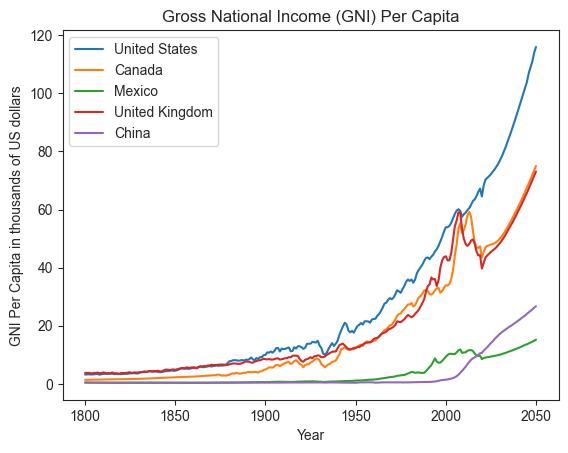

In [45]:
fig, ax= plt.subplots()

gni('United States',3).plot(title = 'Gross National Income (GNI) Per Capita', 
                            legend = True, 
                            ylabel = 'GNI Per Capita in thousands of US dollars',
                            xlabel = 'Year'
                           )
gni('Canada',3).plot(legend=True)
gni('Mexico',3).plot(legend=True)
gni('United Kingdom',3).plot(legend=True)
gni('China',3).plot(legend=True);

fig.savefig('../images/gni.png')

plt.show()
plt.close(fig)

## Life Expectancy vs. GNI Per Capita

I'm going to graph life expectancy vs. GNI per capita.  I expect to see a general trend of life expectancy and GNI per capita increasing together

In [46]:
def le_vs_gni(c, figsz=(6,6)):
    fig, ax = plt.subplots(figsize= figsz)
    
    sns.scatterplot(
        pd.DataFrame({
            'year': [*range(1800,2101)], 
            'population': pop_time(c), 
            'life_expectancy': le[c], 
            'gni_per_capita': gni(c,0)
        }),
        x= 'gni_per_capita',
        y= 'life_expectancy',
        hue= 'year',
        alpha= 0.8,
        ax= ax,
        palette= 'crest'
    )
    
    ax.set(
        title= f'Life Expectancy vs. GNI per capita in the {c}', 
        xlabel= 'Gross National Income (GNI) per capita (in USD)', 
        ylabel= 'Life Expectancy (years)'
    );

    fig.savefig(f'../images/le_gni_{c}.png')

    plt.close(fig)  # this function was returning two plots, so I asked ChatGPT why it creating two plots 
    # and it suggested that I include this plt.close(fig) to ensure that the plot wasn't being automatically created
    # when the function was called and again when the fig is returned (thus two plots).  ChatGPT only contributed 
    # this line of code.
    
    return fig

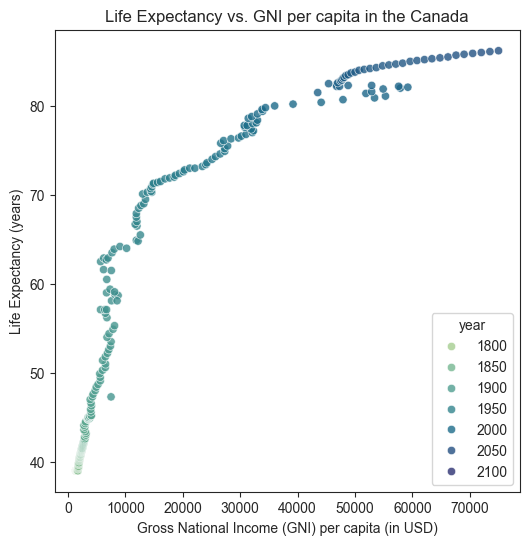

In [47]:
le_vs_gni('Canada')

As expected, life expectancy generally increases as GNI per capita does.  Here GNI per capita is a rough indication of average economic status.  

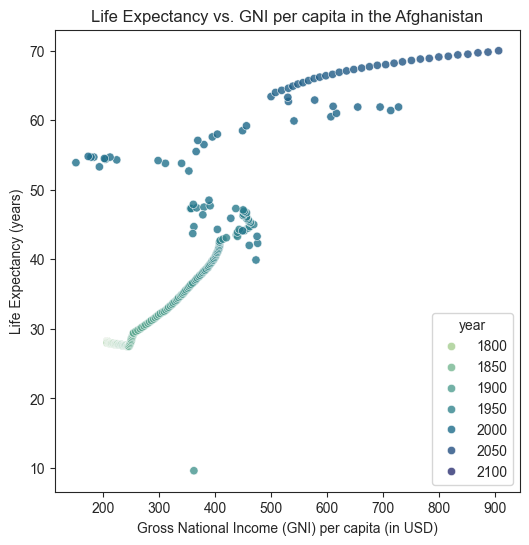

In [48]:
le_vs_gni('Afghanistan')

Here we can see a more stressful example.  Afghanistan has clearly had massive variations in GNI per capita during the 20th and 21st centuries.  

## Country list

Not all countries have complete data.  So lets collect a list of countries that have large amounts of data in all three datasets.

* Population had complete datasets for 196 countries (all except the Holy See)

* Life Expectancy had complete data for 186 countries, there were an additional 9 with significantly smaller datasets

* GNI per capita had complete entries for 190 countries (all except Liechtenstein)

We do not know if all of these datasets worked from the same list of countries.  Let's focus on EDA on the countries which appear in all three datasets.  We need to find the intersection (similar to an inner join) of the countries appearing in each dataset.

In [49]:
print(f'The population data contains complete data for {len(countries_pop)} countries.')
print(f'The life expectancy data contains complete data for {len(countries_le)} countries.')
print(f'The GNI per capita data contains complete data for {len(countries_gni)} countries.')

The population data contains complete data for 196 countries.
The life expectancy data contains complete data for 186 countries.
The GNI per capita data contains complete data for 191 countries.


In [50]:
countries = list(set(countries_pop) & set(countries_le) & set(countries_gni))

print(len(countries))

184


My primlinary analysis will be on these 184 countries.

## Normalized Change

To compare changes in life expectancy, population, and gni per capita for different countries and account for their starting values:  I'm going to use a 'normalized change'.

I'm going to take the difference between a final value and an initial value and divide by the initial value. If the normalized change in life expectancy is $1.20$, the life expectancy in that country has increased by $120\%$. If the initial life expectancy was $40$ years, people are now living $40 \times 1.2 = 48$ years longer with a new life expectancy of $40 + 48 = 88$ years.

$$ \text{normalized change} 
= 
\frac{ \langle\text{final value}\rangle - \langle\text{initial value}\rangle }{ \langle\text{initial value} \rangle }
$$

where

$$
\langle \text{final value} \rangle = \text{average life expectancy for the last twenty years of data}
$$
$$
\langle \text{initial value} \rangle = \text{average life expantancy for the first twenty years of data}
$$

I decided to average over twenty years of data to account for any short term historic events (like local wars) in a small subset of countries.

In [51]:
def norm_compare(x):
    i_value = x.head(20).mean() # average value for first 20 years
    f_value = x.tail(20).mean() # average value for last 10 years
    return (f_value - i_value) / i_value

In [52]:
norm_change=[]

for c in countries:
    norm_change.append([c, norm_compare(pop_time(c)), norm_compare(le[c]), norm_compare(gni(c,0))])

In [53]:
df = pd.DataFrame(data = norm_change, columns=['country', 'norm_pop', 'norm_le', 'norm_gni'])

In [54]:
df.set_index('country')

,norm_pop,norm_le,norm_gni
country,,,
Bolivia,18.181352,1.543485,16.931406
United Kingdom,4.245750,1.220307,15.381650
Myanmar,10.582581,1.604058,2.562704
Botswana,34.811563,1.095089,43.829947
Portugal,1.408228,1.539747,46.431438
...,...,...,...
Sierra Leone,20.328715,2.150996,3.705294
Bhutan,0.807015,1.956944,18.530103
Gambia,62.189320,1.767882,4.710383


In [55]:
corr = df.corr(numeric_only=True)

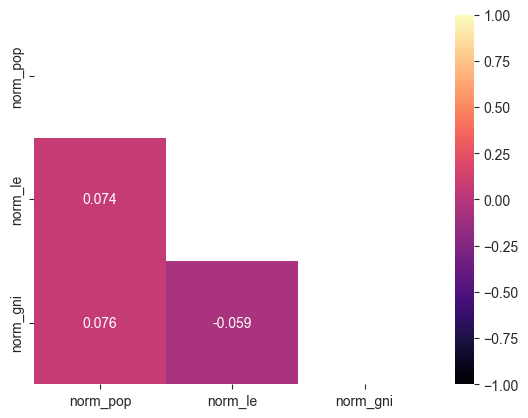

In [56]:
mask = np.zeros_like(df.corr(numeric_only=True))

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots()

sns.heatmap(corr,
           annot=True,
           vmin=-1,
           vmax=1,
           cmap='magma',
           ax=ax,
            mask=mask
           );

fig.savefig('../images/correlations.png')

plt.show()
plt.close(fig)

Interesting, there doesn't seem to be a major correlation between the datasets.  Let's start by looking at each result on it's own and possible relationships between them.

## Normalized Change in Population

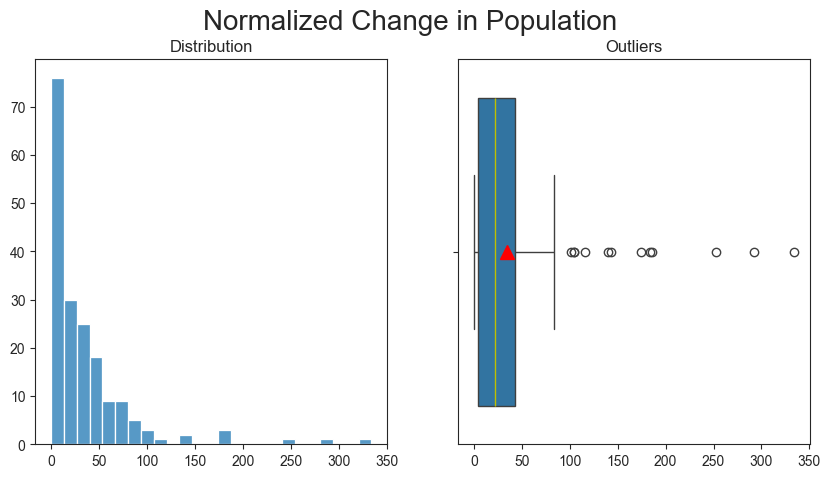

In [57]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

sns.histplot(df['norm_pop'], ax=ax1)

sns.boxplot(df['norm_pop'], orient='h', ax=ax2, medianprops={'color':'y'}, 
            showmeans=True, meanprops={'markerfacecolor':'r', 'markeredgecolor': 'red', 'markersize':10})

fig.suptitle('Normalized Change in Population', size = 20)
ax1.set_title('Distribution')
ax1.set_xlabel('')#Normalized change in population')
ax1.set_ylabel('')#Number of countries')

ax2.set_title('Outliers')
ax2.set_xlabel('');#Normalized change in population');

fig.savefig('../images/norm_pop.png')

plt.show()
plt.close(fig)

Over-performers in this dataset have a normalized change in population of more than 100.  This means their population increased by $10,000/%$.  That's definitely a bit change.

In [58]:
df['norm_pop'].describe()

count    184.000000
mean      34.711879
std       48.008478
min       -0.053670
25%        4.515430
50%       21.600556
75%       43.216378
max      334.199005
Name: norm_pop, dtype: float64

 The high outliers are above $43$

In [59]:
df.sort_values(by= 'norm_pop', ascending=False).head(29)

,country,norm_pop,norm_le,norm_gni
131,United Arab Emirates,334.199005,1.682410,61.549071
12,Qatar,292.404255,1.750487,143.231747
127,"Hong Kong, China",252.985597,1.660458,93.856901
162,Brunei,186.047201,1.853938,91.732586
150,Singapore,183.935844,2.207045,135.762127
153,Niger,173.983912,1.448052,2.908502
69,Australia,143.205426,1.682059,98.892166
109,Malaysia,139.916217,1.759477,40.617647
148,Honduras,115.666667,1.420354,6.015707
40,Dominican Republic,104.391950,1.800669,63.722753


## Normalized Change in Life Expectancy

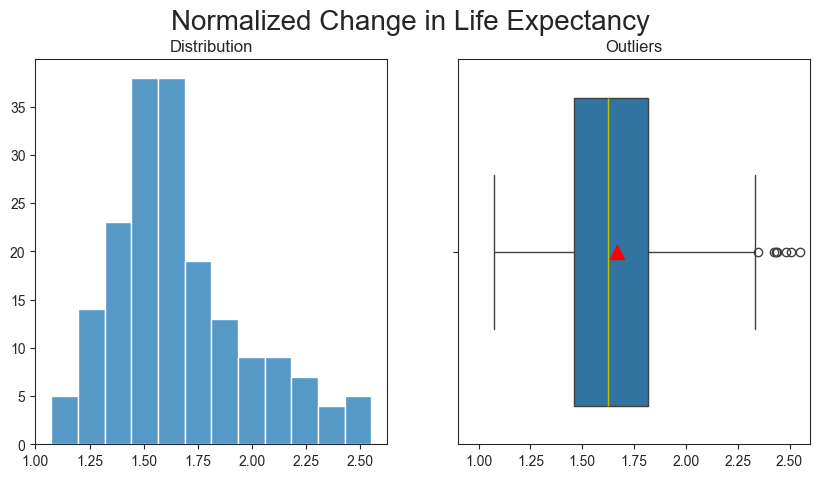

In [60]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

sns.histplot(df['norm_le'], ax=ax1)

sns.boxplot(df['norm_le'], orient='h', ax=ax2, medianprops={'color':'y'}, 
            showmeans=True, meanprops={'markerfacecolor':'r', 'markeredgecolor': 'red', 'markersize':10})


fig.suptitle('Normalized Change in Life Expectancy', size = 20)
ax1.set_title('Distribution')
ax1.set_xlabel('')
ax1.set_ylabel('')

ax2.set_title('Outliers')
ax2.set_xlabel('')
ax2.set(xlim=(0.9,2.6));

fig.savefig('../images/norm_le.png')

plt.show()
plt.close(fig)

In [61]:
df['norm_le'].describe()

count    184.000000
mean       1.667376
std        0.311807
min        1.073018
25%        1.461411
50%        1.622519
75%        1.815851
max        2.551550
Name: norm_le, dtype: float64

In [62]:
df.sort_values(by='norm_le').head()

,country,norm_pop,norm_le,norm_gni
71,Lesotho,10.016304,1.073018,4.455290
3,Botswana,34.811563,1.095089,43.829947
141,Denmark,5.528231,1.142670,38.345775
151,Zimbabwe,31.134006,1.172404,2.462397
137,Eswatini,23.187637,1.188545,17.547809


Only Lesotho has a normalized change in life expectancy, $1.09$ less than the expected minimum $1.10$

In [63]:
df.sort_values(by='norm_le', ascending=False).head(19)

,country,norm_pop,norm_le,norm_gni
119,South Korea,1.911986,2.551550,76.533040
87,Kyrgyz Republic,21.214885,2.506904,13.305446
41,Kuwait,58.661747,2.485385,60.356842
27,Iran,12.461354,2.441211,5.133608
154,Bangladesh,8.558223,2.436078,12.182073
117,Nicaragua,49.631551,2.427362,6.308601
43,Tunisia,15.621759,2.347925,11.668101
75,Turkmenistan,23.274622,2.331875,42.912729
34,Tajikistan,41.698073,2.308058,12.878139
171,Yemen,27.127413,2.283761,6.068412


## Normalized Change in GNI per Capita

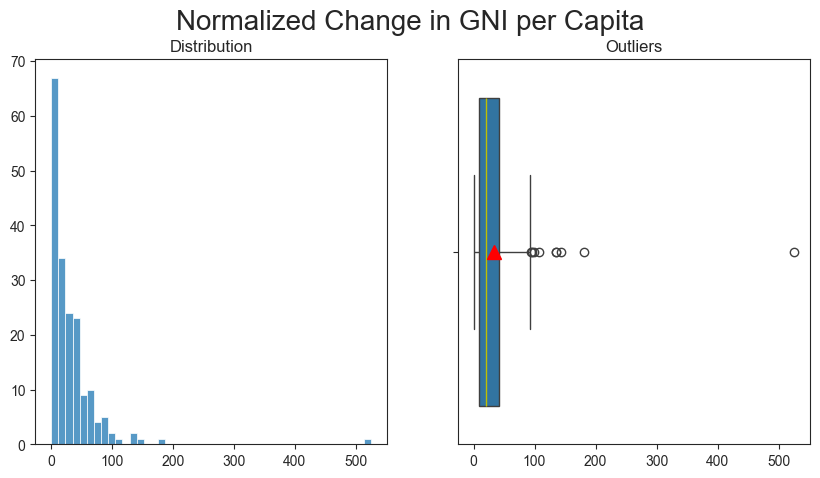

In [64]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

sns.histplot(df['norm_gni'], ax=ax1)

sns.boxplot(df['norm_gni'], orient='h', ax=ax2, medianprops={'color':'y'},
           showmeans=True, meanprops={'markerfacecolor':'r', 'markeredgecolor': 'red', 'markersize':10})


fig.suptitle('Normalized Change in GNI per Capita', size = 20)
ax1.set_title('Distribution')
ax1.set_xlabel('')
ax1.set_ylabel('')

ax2.set_title('Outliers')
ax2.set_xlabel('');

fig.savefig('../images/norm_gni.png')

plt.show()
plt.close(fig)

In [65]:
df['norm_gni'].describe()

count    184.000000
mean      32.704623
std       47.298417
min        0.651286
25%        8.891807
50%       20.471197
75%       42.221512
max      525.704545
Name: norm_gni, dtype: float64

## Normalized Change in Life Expectancy and GNI Per Capita

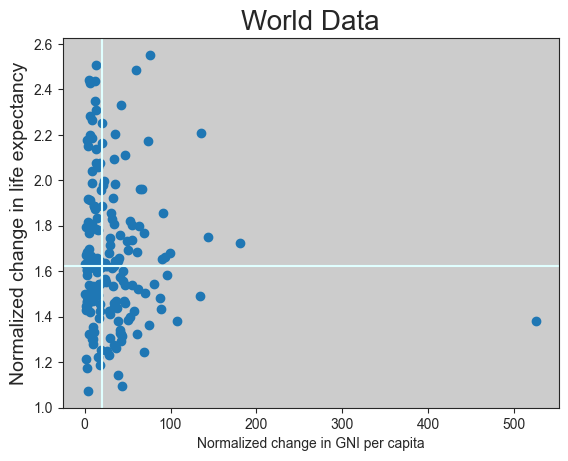

In [66]:
fig, ax= plt.subplots()

ax.axhline(y=df['norm_le'].median(), xmin=0, xmax=1, color='lightcyan')
ax.axvline(x=df['norm_gni'].median(), color='lightcyan')

plt.scatter(x=df['norm_gni'], y= df['norm_le'])#, ax=ax)

ax.set_title('World Data', size=20)
ax.set_xlabel('Normalized change in GNI per capita')
#ax.set_xlim(-10,100)
ax.set_ylabel('Normalized change in life expectancy', size=14)
ax.set_facecolor('0.8');

fig.savefig('../images/norm_le_gni_world.png')

plt.show()
plt.close(fig)

#ax.legend();

## Overperforming, Underperforming and Interesting Combinations

Now there are several interesting groups of countries:
1. Overperforming Countries -- countries that are in the upper half of quantile 4 in both normalized change in life expectancy and normalized GNI per capita
2. Underperforming Countries -- countries that are in the lowest half of quantile 1 in both normalized change in life expectancy and normalized GNI per capita
3. Interesting Mixes -- countries that have extremely high results in either normalized change in life expectancy or normalized change in GNI per capita and extremely low result in the other category.

### 1. Overperforming Countries

Countries in the upper half of Q4 in **both** normalized change in life expectancy and normalized change in GNI per capita.

In [67]:
le_high = df['norm_le'].quantile(q=0.8375)
gni_high = df['norm_gni'].quantile(q=0.8375)

df[(df['norm_le']>le_high) & (df['norm_gni']>gni_high)]

,country,norm_pop,norm_le,norm_gni
41,Kuwait,58.661747,2.485385,60.356842
119,South Korea,1.911986,2.551550,76.533040
150,Singapore,183.935844,2.207045,135.762127
161,Malta,2.058955,2.172648,74.122657


Kuwait, South Korea, Malta, and Singapore are overperforming in both improving both life expectancy and GNI per capita.  It would be interesting to study these countries further and see if these increases have reached the majority of people in the country or if there is a significant gap in access.

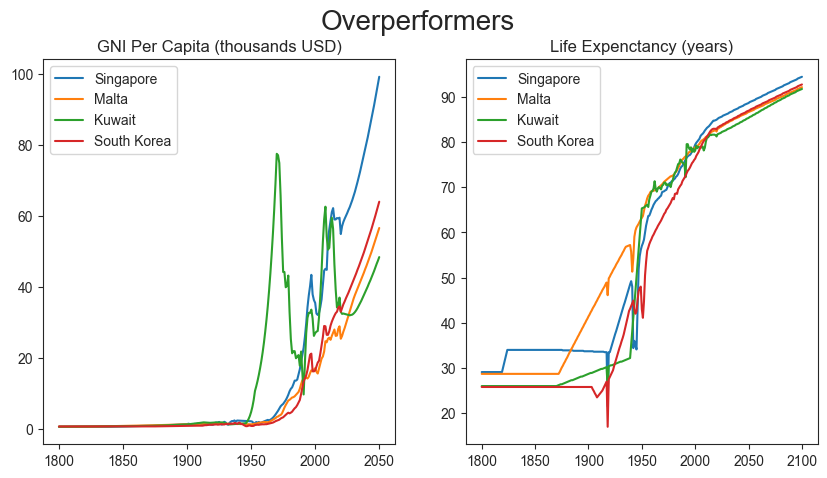

In [68]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
gni('Singapore',3).plot(title = 'GNI Per Capita (thousands USD)', 
                            legend = True, 
                            ax=ax1
                           )

fig.suptitle('Overperformers', size = 20)

gni('Malta',3).plot(legend=True, ax=ax1)
gni('Kuwait',3).plot(legend=True, ax=ax1)
gni('South Korea',3).plot(legend=True, ax=ax1)

le['Singapore'].plot(title= 'Life Expenctancy (years)', legend = True)
le['Malta'].plot(legend= True);
le['Kuwait'].plot(legend= True);
le['South Korea'].plot(legend= True);

fig.savefig('../images/overperformers.png')

plt.show()
plt.close(fig)

### 2. Underperforming Countries

These are countries in the lower half of Q1 in **both** normalized change in life expectancy and normalized change in GNI per capita.

In [69]:
# Underperforming countries:
le_low = df['norm_le'].quantile(q=0.1375)
gni_low = df['norm_gni'].quantile(q=0.1375)

print(f'le_low = {le_low}')
print(f'gni_low = {gni_low}')

df[(df['norm_le']<le_low) & (df['norm_gni']<gni_low)]

le_low = 1.3545566952629617
gni_low = 4.5872190778436694


,country,norm_pop,norm_le,norm_gni
71,Lesotho,10.016304,1.073018,4.455290
83,Central African Republic,36.785662,1.212333,1.441756
151,Zimbabwe,31.134006,1.172404,2.462397


The underperforming countries are Zimbabwe, Lesotho, and Central African Republic.  Zimbabwe and Lesotho are in southern Africa while the Central African Republic is in central Africa.

These countries are likely at much higher risk if an international disaster were to take place.  It would be a good idea to investigate how to support these countries improve their health care and GNI per capita.  

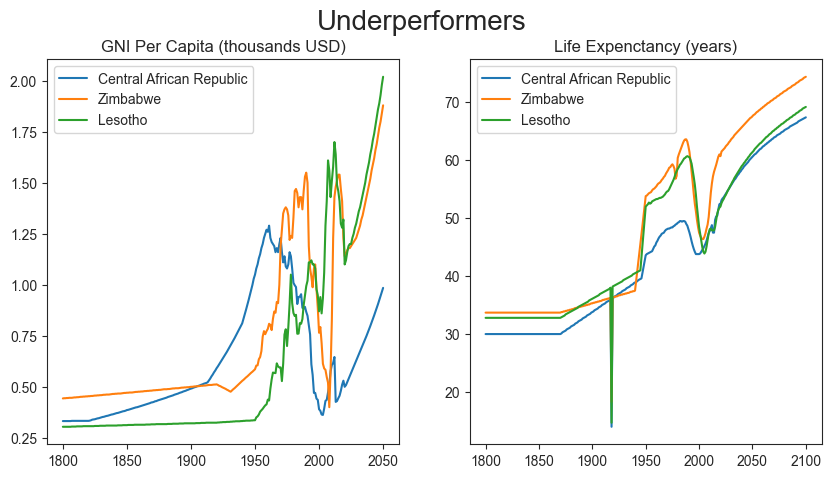

In [70]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Underperformers', size = 20)

gni('Central African Republic',3).plot(title = 'GNI Per Capita (thousands USD)', 
                            legend = True,
                     ax=ax1
                           )
gni('Zimbabwe',3).plot(legend=True, ax=ax1)
gni('Lesotho',3).plot(legend=True, ax=ax1)

le['Central African Republic'].plot(title= 'Life Expenctancy (years)', legend = True)
le['Zimbabwe'].plot(legend= True);
le['Lesotho'].plot(legend= True);

fig.savefig('../images/underperformers.png')

plt.show()
plt.close(fig)

### 3. Interesting Mixes

#### Low Normalized Change in Life Expectancy & High Normalized Change in GNI Per Capita

In [71]:
df[(df['norm_le']<le_low) & (df['norm_gni']>gni_high)]

,country,norm_pop,norm_le,norm_gni
68,Cyprus,6.268544,1.323896,60.968895
156,Norway,6.809524,1.246461,69.564103


Both Cyprus and Norway have high normalized change GNI per capita and low normalized change in life expectancy

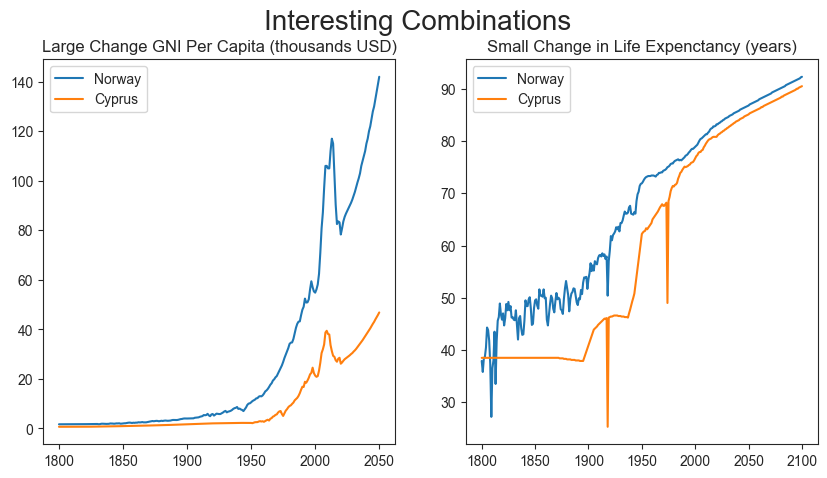

In [72]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))

fig.suptitle('Interesting Combinations', size = 20)

gni('Norway',3).plot(title = 'Large Change GNI Per Capita (thousands USD)', 
                            legend = True, 
                            #ylabel = 'GNI Per Capita in thousands of US dollars',
                            #xlabel = 'Year',
                     ax=ax1
                           )
gni('Cyprus',3).plot(legend=True, ax=ax1)

le['Norway'].plot(title= 'Small Change in Life Expenctancy (years)', legend = True)
le['Cyprus'].plot(legend= True);

fig.savefig('../images/highgni_lowle.png')

plt.show()
plt.close(fig)

In [73]:
life_expect['1800'].describe()

count    186.000000
mean      31.503763
std        3.809510
min       23.400000
25%       29.025000
50%       31.750000
75%       33.875000
max       42.900000
Name: 1800, dtype: float64

Taking the mean of each country's life expectancy in 1800, we get 31.5 years.  Since Norway and Cyprus both start with a relatively high life expectancy (upper 30's), there was not enough room for them to have a large normalized change in life expectancy.  They do have a high life expectancy currently as well as a high GNI per capita.  

#### High Normalized Change in Life Expectancy & Low Normalized Change in GNI Per Capita

In [74]:
df[(df['norm_le']>le_high) & (df['norm_gni']<gni_low)]

,country,norm_pop,norm_le,norm_gni
159,Uganda,54.565199,2.175889,2.239905
179,Sierra Leone,20.328715,2.150996,3.705294


Here is the opposite case: high normalized change in life expectancy, but low normalized change in GNI per capita.  Both Uganda and Sierra Leone had this experience.

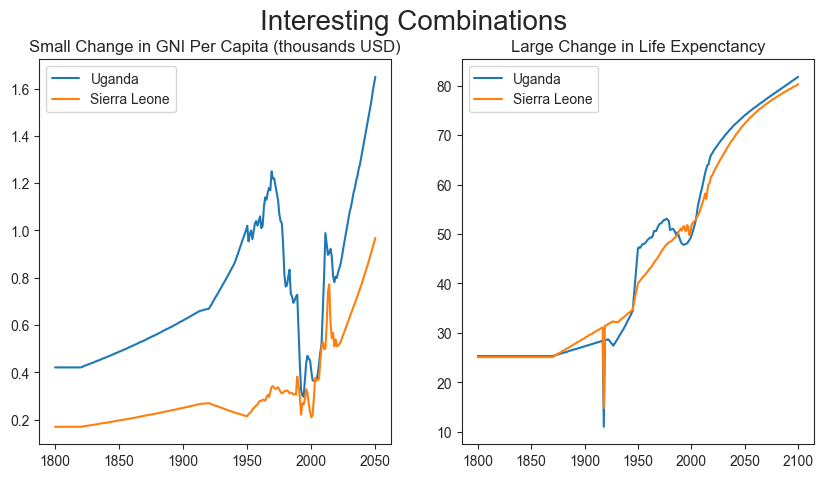

In [75]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Interesting Combinations', size = 20)

gni('Uganda',3).plot(title = 'Small Change in GNI Per Capita (thousands USD)', 
                            legend = True, 
                     ax=ax1
                           )
gni('Sierra Leone',3).plot(legend=True, ax=ax1)

le['Uganda'].plot(title= 'Large Change in Life Expenctancy', legend = True)
le['Sierra Leone'].plot(legend= True);

fig.savefig('../images/highle_lowgni.png')

plt.show()
plt.close(fig)

There are many countries with a low normalized GNI per capita.  It's particularly notable that these countries were able to improve their health care to make such impressive gains in the their life expectancies.  It's definitely worth investigating what they did and how much, if any, help from others they had.

### Unexpected Outliers

#### Romania: High Normalized Change in GNI Per Capita

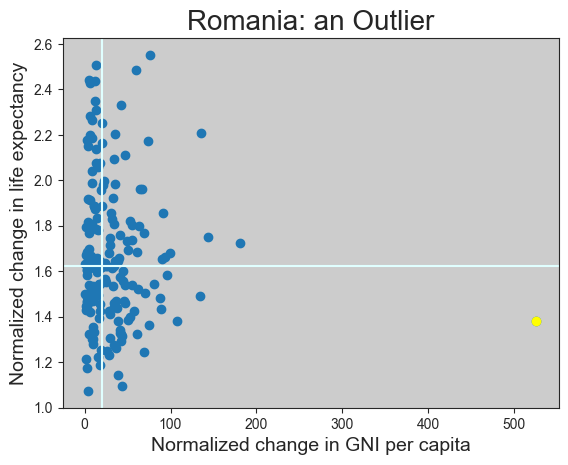

In [76]:
fig, ax= plt.subplots()

ax.axhline(y=df['norm_le'].median(), xmin=0, xmax=1, color='lightcyan')
ax.axvline(x=df['norm_gni'].median(), color='lightcyan')

plt.scatter(x=df['norm_gni'], y= df['norm_le'])
plt.scatter(x=df[df['country'].isin(['Romania'])]['norm_gni'], 
            y= df[df['country'].isin(['Romania'])]['norm_le'], 
            color='yellow')#,
           #label='Countries of Uncertain Region')

plt.annotate('Romania', xy= (580, 1.4), xytext= (490, 1.377), color='yellow')

ax.set_title('Romania: an Outlier', size = 20)
ax.set_xlabel('Normalized change in GNI per capita', size=14)
ax.set_ylabel('Normalized change in life expectancy', size=14)
ax.set_facecolor('0.8');

fig.savefig('../images/norm_romania.png')

plt.show()
plt.close(fig)

What's that outlier?  That's Romania.  Massive increase in GNI per capita.  Below the median normalized change in life expectancy.

In [77]:
df[df['country']=='Romania']

,country,norm_pop,norm_le,norm_gni
6,Romania,1.330401,1.379692,525.704545


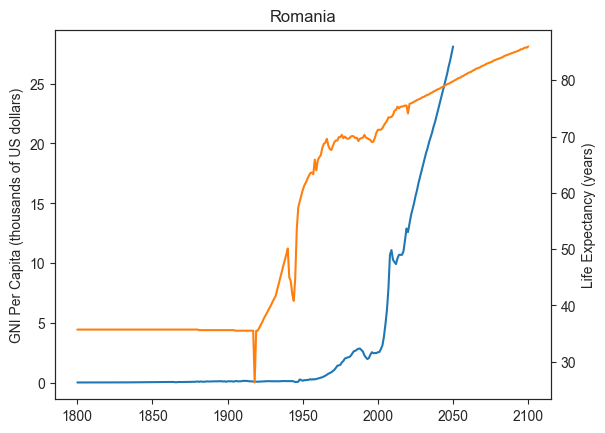

In [78]:
fig, ax = plt.subplots()
gni('Romania',3).plot(title = 'Romania', 
#                      legend = True, 
 #                     label = 'GNI per capita',
                      ylabel = 'GNI Per Capita (thousands of US dollars)',
  #                    xlabel = 'Year'
                      )
le['Romania'].plot(
   # xlabel='year',
    ylabel='Life Expectancy (years)', 
    secondary_y=True,
   # legend=True,
   # label='Life expectancy'
);

fig.savefig('../images/romania.png')

plt.show()
plt.close(fig)

In [79]:
gni('Romania',0)['1800']

44.0

In [80]:
gni_s.head()

country,Afghanistan,Angola,Albania,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,Azerbaijan,...,Uzbekistan,St. Vincent and the Grenadines,Venezuela,Vietnam,Vanuatu,Samoa,Yemen,South Africa,Zambia,Zimbabwe
1800,207.0,517.0,207.0,738.0,794.0,111.0,650.0,763.0,1940.0,33.0,...,199.0,546.0,459.0,226.0,416.0,373.0,197.0,800.0,213.0,443.0
1801,207.0,519.0,207.0,740.0,797.0,111.0,650.0,769.0,1950.0,33.0,...,199.0,546.0,457.0,226.0,417.0,373.0,198.0,791.0,214.0,444.0
1802,207.0,522.0,207.0,743.0,799.0,111.0,650.0,773.0,1960.0,33.0,...,199.0,546.0,454.0,226.0,417.0,373.0,198.0,782.0,215.0,444.0
1803,207.0,524.0,207.0,746.0,802.0,111.0,650.0,777.0,1970.0,33.0,...,199.0,546.0,452.0,226.0,417.0,373.0,199.0,773.0,215.0,445.0
1804,207.0,525.0,207.0,749.0,805.0,111.0,650.0,782.0,1970.0,33.0,...,199.0,546.0,450.0,226.0,417.0,373.0,199.0,765.0,215.0,445.0


In [81]:
gni_1800=[]
for c in gni_s.columns:
    if gni(c,0)['1800'] >0:
        gni_1800.append(gni(c,0)['1800'])

gni_1800[:5]

[207.0, 517.0, 207.0, 738.0, 794.0]

In [82]:
sum(gni_1800)/len(gni_1800)

608.6157894736842

In [83]:
min(gni_1800), max(gni_1800)

(33.0, 4780.0)

The country average GNI per capita was 608 US dollars, while Romania was one of the lower starting values (44 USD, the minimum in 1800 was 33 USD).  So the large normalized increased in GNI per capita was due to this lower starting value.

#### Burundi: Smallest Normalized Change in GNI Per Capita

In [84]:
df.sort_values(by='norm_gni').head()

,country,norm_pop,norm_le,norm_gni
96,Burundi,40.772785,1.498571,0.651286
106,Sudan,32.053463,1.633280,0.964556
37,Syria,33.048818,1.793408,1.108472
21,Somalia,61.766278,1.444558,1.246502
83,Central African Republic,36.785662,1.212333,1.441756


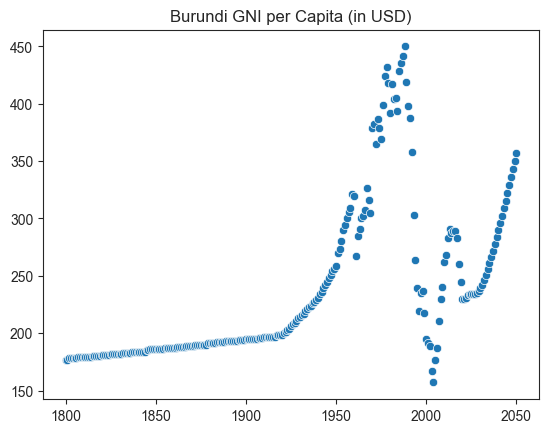

In [85]:
fig, ax= plt.subplots()

sns.scatterplot(data=gni('Burundi'))

ax.xaxis.set_major_locator(MultipleLocator(50,1800))

ax.set_title('Burundi GNI per Capita (in USD)');
#ax.set_xlabel('')
ax.set_ylabel('');

fig.savefig('../images/burundi_gni.png')

plt.show()
plt.close(fig)

The lowest normalized change in GNI per capita is just 0.6512 in Burundi, experiencing significantly less than $100\%$ increase in GNI per capita between 1800 and 2050.  Another perspective on this is that Burundi has less than doubled their GNI per capita in this timeframe.  

## Regions of the World

Second goal: Can we determine what part of the world these countries best belong to by comparing their normalized changes in life expectancy anc GNI per capita with the values in possible regions?

Countries with unclear regions:
* Cyprus -- either Europe or the Middle East
* Mongolia -- central asia or east asia
* Turkey -- either the Middle East or Eastern Ruep middle east or eastern europe + Russia
* Timor-Leste -- eith Oceania or Southeast Asia
* Egypt, Sudan -- either north Africa or the Middle East
* South Sudan -- either North or East Africa
* Comoros, Malawi, Mauritius, Zambia, and/or Zimbabwe -- are each sometimes in Southern or East Africa (and not necessarily all of them)
* Madagascar -- somewhere in East Africa, south Africa, the Middle East, or South Asia
* Angola -- either Southern or Central Africa

In [86]:
# Continents
north_america = ['Canada', 'United States', 'Mexico']
south_america = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 
                 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
central_america = ['Belize', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Nicaragua', 'Panama']
caribbean = ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Cuba', 'Dominica', 'Dominican Republic', 
             'Grenada', 'Haiti', 'Jamaica', 'St. Kitts and Nevis', 'St. Lucia', 'St. Vincent and the Grenadines', 
             'Trinidad and Tobago']
europe = ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 
          'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 
          'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 
          'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenergo', 'Netherlands', 
          'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'San Marino', 'Serbia', 
          'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Turkey', 'Ukraine', 'United Kingdom', 'Holy See']
africa = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde',
          'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Dijbouti',
          'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea',
          'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania',
          'Marutitius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe',
          'Senegal', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia',
          'Uganda', 'Zambia', 'Zimbabwe']
asia = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China',
        'Cyprus', 'Egypt', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan'
        'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'Oman', 
        'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'Sri Lanka', 'Syria', 
        'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 
        'Vietnam', 'Yemen']
oceania = ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia, Fed. Sts.', 'Nauru', 'New Zealand', 
           'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

In [109]:
# world regions
western_europe = ['Andorra', 'Austria', 'Belgium', 'Denmark', 'Finland', 'France', 'Germany', 'Greece',
                  'Iceland', 'Ireland', 'Italy', 'Liechtenstein', 'Luxembourg', 'Monaco', 'Netherlands', 'Norway', 
                  'Portugal', 'San Marino', 'Spain', 'Sweden', 'United Kingdom', 'Holy See']
eastern_europe_russia = ['Albania', 'Belarus', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 
                         'Estonia', 'Hungary', 'Kosovo', 'Latvia', 'Lithuania', 'Malta', 'Moldova', 'Montenergo',
                         'North Macedonia', 'Poland', 'Romania', 'Russia', 'Serbia', 'Slovak Republic', 'Slovenia', 
                         'Turkey', 'Ukraine']
central_asia = ['Kazakhstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 'Uzbekistan']
east_asia = ['China', 'Japan', 'Singapore', 'South Korea']
south_asia = ['Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']
southeast_asia = ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Thailand', 'Vietnam']
middle_east = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Georgia', 'Iran', 'Iraq', 'Israel', 'Jordan', 
               'Kuwait', 'Lebanon', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Syria', 'Turkey', 'United Arab Emirates', 
               'Yemen']
north_africa = ['Algeria', 'Libya', 'Morocco', 'Tunisia'] 
west_africa = ['Benin', 'Burkina Faso', 'Cape Verde', "Cote d'Ivoire", 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 
               'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo']
central_africa = ['Angola', 'Cameroon', 'Central African Republic', 'Chad', 'Congo, Dem. Rep.', 'Congo, Rep.', 
                  'Equatorial Guinea', 'Gabon', 'Sao Tome and Principe']
southern_africa = ['Botswana', 'Eswatini', 'Lesotho', 'Namibia', 'South Africa']
east_africa = ['Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Malawi', 'Madagascar', 'Mauritius', 
               'Mozambique', 'Rwanda', 'Somalia', 'Tanzania', 'Uganda', 'Zambia', 'Zimbabwe']
english_north_america = ['Canada', 'United States']
mesoamerica = ['Mexico'] + central_america
oceania = ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia, Fed. Sts.', 'Nauru', 'New Zealand', 
           'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

### Cyprus: Europe or Middle East

In [88]:
df[df['country']=='Cyprus']

,country,norm_pop,norm_le,norm_gni
68,Cyprus,6.268544,1.323896,60.968895


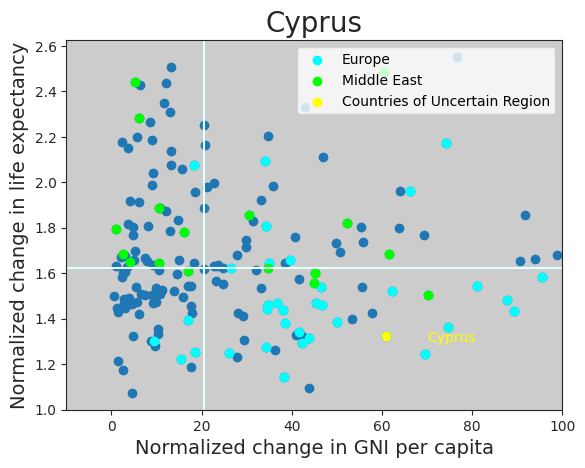

In [89]:
fig, ax= plt.subplots()

plt.style.use('default')
plt.scatter(x=df['norm_gni'], y= df['norm_le'])
plt.scatter(x=df[df['country'].isin(europe)]['norm_gni'], 
            y= df[df['country'].isin(europe)]['norm_le'], 
            color='cyan',
            label='Europe')
plt.scatter(x=df[df['country'].isin(middle_east)]['norm_gni'], 
            y= df[df['country'].isin(middle_east)]['norm_le'], 
            color='lime', 
            label='Middle East')
plt.scatter(x=df[df['country'].isin(['Cyprus'])]['norm_gni'], 
            y= df[df['country'].isin(['Cyprus'])]['norm_le'], 
            color='yellow',
           label='Countries of Uncertain Region')

plt.annotate('Cyprus', xy= (67, 1.3), xytext= (70,1.3), color='yellow')

ax.axhline(y=df['norm_le'].median(), xmin=0, xmax=1, color='lightcyan')
ax.axvline(x=df['norm_gni'].median(), color='lightcyan')

ax.set_title('Cyprus', size=20)
ax.set_xlabel('Normalized change in GNI per capita', size=14)
ax.set_xlim(-10,100)
ax.set_ylabel('Normalized change in life expectancy', size=14)
ax.set_facecolor('0.8')

ax.legend();

fig.savefig('../images/cyprus.png')

plt.show()
plt.close(fig)

Cyprus appears to be behaving more like the other European countries, however this not a super clear case because of the overlap between the regional groups.

### Mongolia: Central or East Asia

I also included Eastern Europe and Russia since Mongolia is right next to Russia. 

In [90]:
df[df['country']=='Mongolia']

,country,norm_pop,norm_le,norm_gni
31,Mongolia,7.574596,1.505818,7.41985


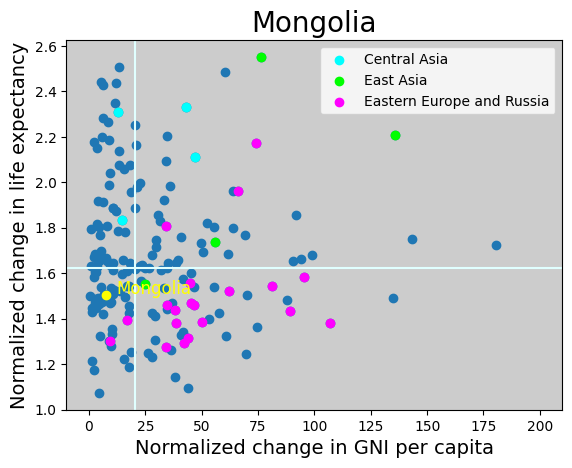

In [110]:
fig, ax= plt.subplots()

plt.style.use('default')
plt.scatter(x=df['norm_gni'], y= df['norm_le'])#, ax=ax)
plt.scatter(x=df[df['country'].isin(central_asia)]['norm_gni'], 
            y= df[df['country'].isin(central_asia)]['norm_le'],
            color='cyan',
            label='Central Asia')
plt.scatter(x=df[df['country'].isin(east_asia)]['norm_gni'], 
            y= df[df['country'].isin(east_asia)]['norm_le'], 
            color='lime', 
            label='East Asia')
plt.scatter(x=df[df['country'].isin(eastern_europe_russia)]['norm_gni'], 
            y= df[df['country'].isin(eastern_europe_russia)]['norm_le'], 
            color='magenta', 
            label='Eastern Europe and Russia')
plt.scatter(x=df[df['country'].isin(['Mongolia'])]['norm_gni'], 
            y= df[df['country'].isin(['Mongolia'])]['norm_le'], 
            color='yellow')#,
           #label='Mongolia')

plt.annotate('Mongolia', xy= (8, 1.5), xytext= (12,1.51), color='yellow', size=12)

ax.axhline(y=df['norm_le'].median(), xmin=0, xmax=1, color='lightcyan')
ax.axvline(x=df['norm_gni'].median(), color='lightcyan')

ax.set_title('Mongolia', size=20)
ax.set_xlabel('Normalized change in GNI per capita', size=14)
ax.set_xlim(-10,210)
ax.set_ylabel('Normalized change in life expectancy', size=14)
ax.set_facecolor('0.8')

ax.legend();

fig.savefig('../images/mongolia.png')

plt.show()
plt.close(fig)

This is not a clear case either.  But it's definitely not part of central Asia according to this dataset.

### Turkey: Middle East or Eastern Europe & Russia

In [92]:
df[df['country']=='Turkey']

,country,norm_pop,norm_le,norm_gni
102,Turkey,7.738271,1.556571,45.01687


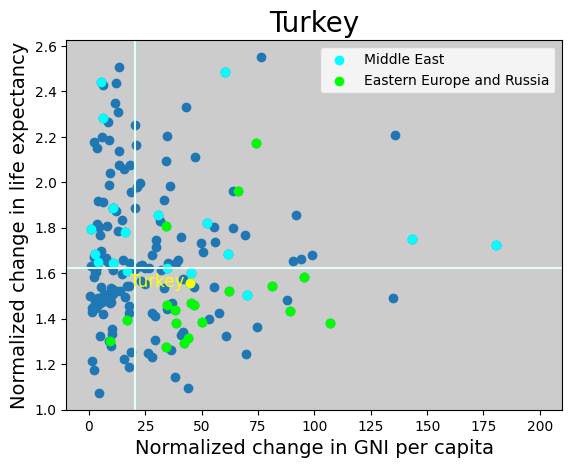

In [93]:
fig, ax= plt.subplots()

plt.style.use('default')
plt.scatter(x=df['norm_gni'], y= df['norm_le'])#, ax=ax)
plt.scatter(x=df[df['country'].isin(middle_east)]['norm_gni'], 
            y= df[df['country'].isin(middle_east)]['norm_le'],
            color='cyan',
            label='Middle East')
plt.scatter(x=df[df['country'].isin(eastern_europe_russia)]['norm_gni'], 
            y= df[df['country'].isin(eastern_europe_russia)]['norm_le'], 
            color='lime', 
            label='Eastern Europe and Russia')
plt.scatter(x=df[df['country'].isin(['Turkey'])]['norm_gni'], 
            y= df[df['country'].isin(['Turkey'])]['norm_le'], 
            color='yellow')#,
           #label='Countries of Uncertain Region')

plt.annotate('Turkey', xy= (50, 1.6), xytext= (18,1.54), color='yellow', size =12)

ax.axhline(y=df['norm_le'].median(), xmin=0, xmax=1, color='lightcyan')
ax.axvline(x=df['norm_gni'].median(), color='lightcyan')

ax.set_title('Turkey', size=20)
ax.set_xlabel('Normalized change in GNI per capita', size=14)
ax.set_xlim(-10,210)
ax.set_ylabel('Normalized change in life expectancy', size=14)
ax.set_facecolor('0.8')

ax.legend();

fig.savefig('../images/turkey.png')

plt.show()
plt.close(fig)

I don't think this case is very clear at all.  Turkey could easily fit into either Eastern Europe or the Middle East.  

### Timor-Leste: Oceania or Southeast Asia

In [94]:
df[df['country']=='Timor-Leste']

,country,norm_pop,norm_le,norm_gni
170,Timor-Leste,12.750456,1.806401,8.113475


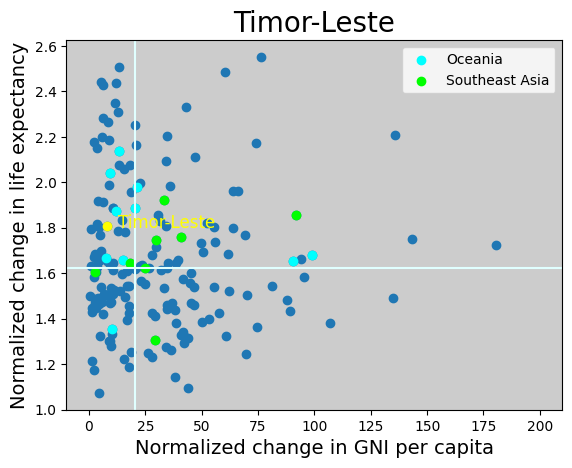

In [95]:
fig, ax= plt.subplots()

plt.style.use('default')
plt.scatter(x=df['norm_gni'], y= df['norm_le'])#, ax=ax)
plt.scatter(x=df[df['country'].isin(oceania)]['norm_gni'], 
            y= df[df['country'].isin(oceania)]['norm_le'], 
            color='cyan',
            label='Oceania')
plt.scatter(x=df[df['country'].isin(southeast_asia)]['norm_gni'], 
            y= df[df['country'].isin(southeast_asia)]['norm_le'], 
            color='lime', 
            label='Southeast Asia')
plt.scatter(x=df[df['country'].isin(['Timor-Leste'])]['norm_gni'], 
            y= df[df['country'].isin(['Timor-Leste'])]['norm_le'], 
            color='yellow')#,
           #label='Timor-Leste')

plt.annotate('Timor-Leste', xy= (5, 1.8), xytext= (13,1.8), color='yellow', size=12)

ax.axhline(y=df['norm_le'].median(), xmin=0, xmax=1, color='lightcyan')
ax.axvline(x=df['norm_gni'].median(), color='lightcyan')

ax.set_title('Timor-Leste', size=20)
ax.set_xlabel('Normalized change in GNI per capita', size=14)
ax.set_xlim(-10,210)
ax.set_ylabel('Normalized change in life expectancy', size=14)
ax.set_facecolor('0.8')

ax.legend();

fig.savefig('../images/timorleste.png')

plt.show()
plt.close(fig)

This is unclear as well.  But this is because Oceania and Southeast Asia appear to have a large overlap in our parameter space.  Regional affliation needs more information.

### Egypt and Sudan: North Africa or Middle East

We will treat each country separately.

In [96]:
df[df['country']=='Egypt']

,country,norm_pop,norm_le,norm_gni
5,Egypt,51.729415,1.457121,17.648118


In [97]:
df[df['country']=='Sudan']

,country,norm_pop,norm_le,norm_gni
106,Sudan,32.053463,1.63328,0.964556


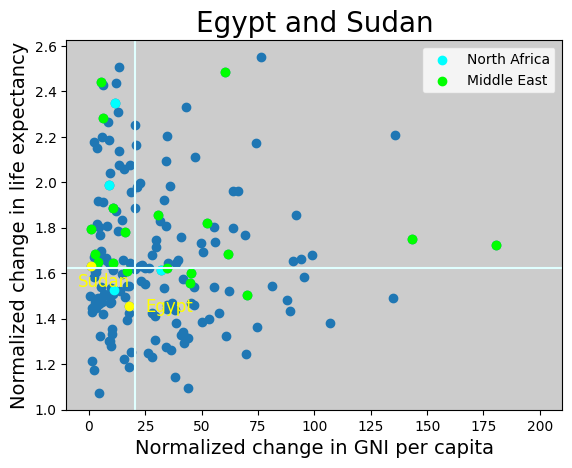

In [98]:
fig, ax= plt.subplots()

plt.style.use('default')
plt.scatter(x=df['norm_gni'], y= df['norm_le'])#, ax=ax)
plt.scatter(x=df[df['country'].isin(north_africa)]['norm_gni'], 
            y= df[df['country'].isin(north_africa)]['norm_le'], 
            color='cyan',
            label='North Africa')
plt.scatter(x=df[df['country'].isin(middle_east)]['norm_gni'], 
            y= df[df['country'].isin(middle_east)]['norm_le'], 
            color='lime', 
            label='Middle East')
plt.scatter(x=df[df['country'].isin(['Egypt', 'Sudan'])]['norm_gni'], 
            y= df[df['country'].isin(['Egypt', 'Sudan'])]['norm_le'], 
            color='yellow')#,
           #label='Countries of Uncertain Region')

plt.annotate('Egypt', xy= (19,1.45), xytext= (25, 1.43), color='yellow', size=12)
plt.annotate('Sudan', xy= (1.1, 1.6), xytext= (-5, 1.54), color='yellow', size=12)

ax.axhline(y=df['norm_le'].median(), xmin=0, xmax=1, color='lightcyan')
ax.axvline(x=df['norm_gni'].median(), color='lightcyan')

ax.set_title('Egypt and Sudan', size=20)
ax.set_xlabel('Normalized change in GNI per capita', size=14)
ax.set_xlim(-10,210)
ax.set_ylabel('Normalized change in life expectancy', size=14)
ax.set_facecolor('0.8')

ax.legend();

fig.savefig('../images/egypt_sudan.png')

plt.show()
plt.close(fig)

Again, a very wide overlap between North Africa and the Middle East.  Regional affliation cannot be determined with this data.

### South Sudan: North or East Africa
Country in question: South Sudan

In [99]:
df[df['country']=='South Sudan']

,country,norm_pop,norm_le,norm_gni
146,South Sudan,21.413628,1.885581,10.726674


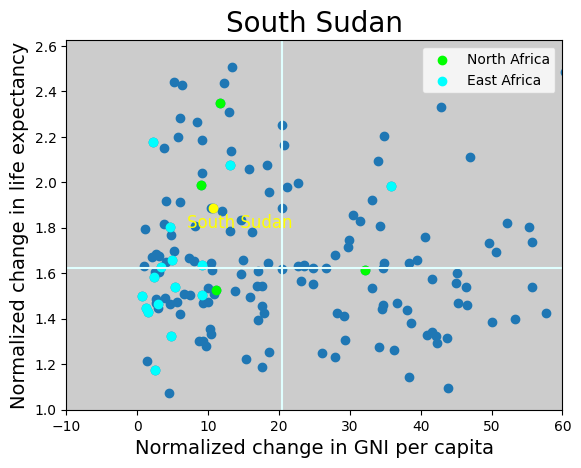

In [100]:
fig, ax= plt.subplots()

ax.axhline(y=df['norm_le'].median(), xmin=0, xmax=1, color='lightcyan')
ax.axvline(x=df['norm_gni'].median(), color='lightcyan')

plt.scatter(x=df['norm_gni'], y= df['norm_le'])#, ax=ax)
plt.scatter(x=df[df['country'].isin(north_africa)]['norm_gni'], 
            y= df[df['country'].isin(north_africa)]['norm_le'],
            color='lime',
            label='North Africa')
plt.scatter(x=df[df['country'].isin(east_africa)]['norm_gni'], 
            y= df[df['country'].isin(east_africa)]['norm_le'], 
            color='cyan', 
            label='East Africa')
plt.scatter(x=df[df['country'].isin(['South Sudan'])]['norm_gni'], 
            y= df[df['country'].isin(['South Sudan'])]['norm_le'], 
            color='yellow')#,
           #label='Countries of Uncertain Region')

plt.annotate('South Sudan', xy= (12,1.9), xytext= (7,1.8), color='yellow', size=12)


ax.set_title('South Sudan', size=20)
ax.set_xlabel('Normalized change in GNI per capita', size=14)
ax.set_xlim(-10,60)
ax.set_ylabel('Normalized change in life expectancy', size=14)
ax.set_facecolor('0.8')

ax.legend();

fig.savefig('../images/south_sudan.png')

plt.show()
plt.close(fig)

Again the regional overlap is too great to make a determination.  

### Angola: Central or Southern Africa

In [101]:
df[df['country']=='Angola']

,country,norm_pop,norm_le,norm_gni
94,Angola,78.171975,1.917037,4.124327


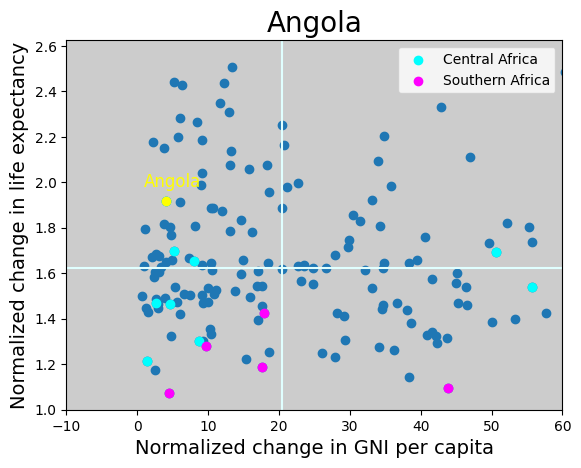

In [102]:
fig, ax= plt.subplots()

ax.axhline(y=df['norm_le'].median(), xmin=0, xmax=1, color='lightcyan')
ax.axvline(x=df['norm_gni'].median(), color='lightcyan')

plt.scatter(x=df['norm_gni'], y= df['norm_le'])#, ax=ax)
plt.scatter(x=df[df['country'].isin(central_africa)]['norm_gni'], 
            y= df[df['country'].isin(central_africa)]['norm_le'], 
            color='cyan',
            label='Central Africa')
plt.scatter(x=df[df['country'].isin(southern_africa)]['norm_gni'], 
            y= df[df['country'].isin(southern_africa)]['norm_le'], 
            color='magenta', 
            label='Southern Africa')
plt.scatter(x=df[df['country'].isin(['Angola'])]['norm_gni'], 
            y= df[df['country'].isin(['Angola'])]['norm_le'], 
            color='yellow')#,
           #label='Countries of Uncertain Region')

plt.annotate('Angola', xy= (5,1.9), xytext= (1,1.98), color='yellow', size=12)


ax.set_title('Angola', size=20)
ax.set_xlabel('Normalized change in GNI per capita', size=14)
ax.set_xlim(-10,60)
ax.set_ylabel('Normalized change in life expectancy', size=14)
ax.set_facecolor('0.8')

ax.legend();

fig.savefig('../images/angola.png')

plt.show()
plt.close(fig)

Angola is definitely closer to the central African countries (in cyan) than the southern African countries (shown in magenta).

### Comoros, Malawi, Mauritius, Zambia, Zimbabwe: Southern or East Africa

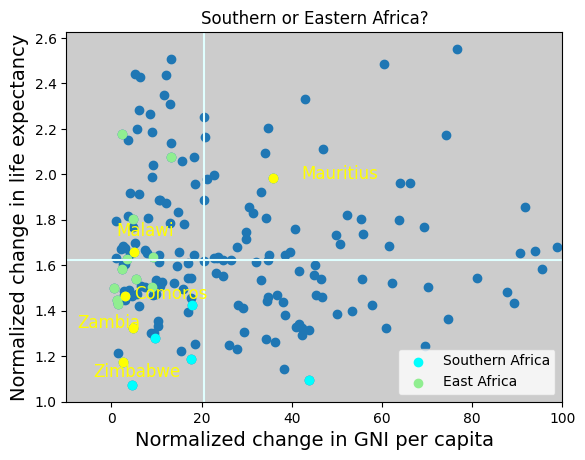

In [103]:
fig, ax= plt.subplots()

plt.style.use('default')
plt.scatter(x=df['norm_gni'], y= df['norm_le'])#, ax=ax)
plt.scatter(x=df[df['country'].isin(southern_africa)]['norm_gni'], 
            y= df[df['country'].isin(southern_africa)]['norm_le'], 
            color='cyan',
            label='Southern Africa')
plt.scatter(x=df[df['country'].isin(east_africa)]['norm_gni'], 
            y= df[df['country'].isin(east_africa)]['norm_le'], 
            color='lightgreen', 
            label='East Africa')
plt.scatter(x=df[df['country'].isin(['Comoros', 'Malawi', 'Mauritius', 'Zambia', 'Zimbabwe'])]['norm_gni'], 
            y= df[df['country'].isin(['Comoros', 'Malawi', 'Mauritius', 'Zambia', 'Zimbabwe'])]['norm_le'], 
            color='yellow')#,
           #label='Countries of Uncertain Region')

plt.annotate('Comoros', xy= (3.3, 1.48), xytext= (5,1.45), color='yellow', size=12)
plt.annotate('Malawi', xy= (5.6,1.68), xytext= (1,1.73), color='yellow', size=12)
plt.annotate('Mauritius', xy= (40, 2), xytext= (42, 1.98), color='yellow', size=12)
plt.annotate('Zambia', xy= (5, 1.3), xytext= (-7.5,1.325), color='yellow', size=12)
plt.annotate('Zimbabwe', xy= (2.85, 1.19), xytext= (-4,1.11), color='yellow', size=12)

ax.axhline(y=df['norm_le'].median(), xmin=0, xmax=1, color='lightcyan')
ax.axvline(x=df['norm_gni'].median(), color='lightcyan')

ax.set_title('Southern or Eastern Africa?')
ax.set_xlabel('Normalized change in GNI per capita', size=14)
ax.set_xlim(-10,100)
ax.set_ylabel('Normalized change in life expectancy', size=14)
ax.set_facecolor('0.8')

ax.legend();

fig.savefig('../images/se_africa.png')

plt.show()
plt.close(fig)

Here the Zimbabwe and Zambia appear to be closer to the other Southern Africa countries (in orange).  While Comoros and Malawi behave more like the other East African countries.  Mauritius appears to behave like neither region, so it will be left uncategorized.  

In [104]:
df[df['country'].isin(['Comoros', 'Malawi', 'Mauritius', 'Zambia', 'Zimbabwe'])].sort_values(by='norm_le')

,country,norm_pop,norm_le,norm_gni
151,Zimbabwe,31.134006,1.172404,2.462397
107,Zambia,68.239651,1.323620,4.765002
99,Comoros,26.644081,1.463396,2.931019
56,Malawi,60.485670,1.660066,4.959317
97,Mauritius,11.290551,1.984495,35.857392


In [105]:
df[df['country'].isin(southern_africa)].sort_values(by='norm_le')

,country,norm_pop,norm_le,norm_gni
71,Lesotho,10.016304,1.073018,4.455290
3,Botswana,34.811563,1.095089,43.829947
137,Eswatini,23.187637,1.188545,17.547809
160,South Africa,49.299401,1.279254,9.668254
47,Namibia,23.251482,1.426235,17.932536


### Somewhere
Country in question: Madagascar

In [106]:
df[df['country']=='Madagascar']

,country,norm_pop,norm_le,norm_gni
120,Madagascar,48.851782,1.582131,2.412329


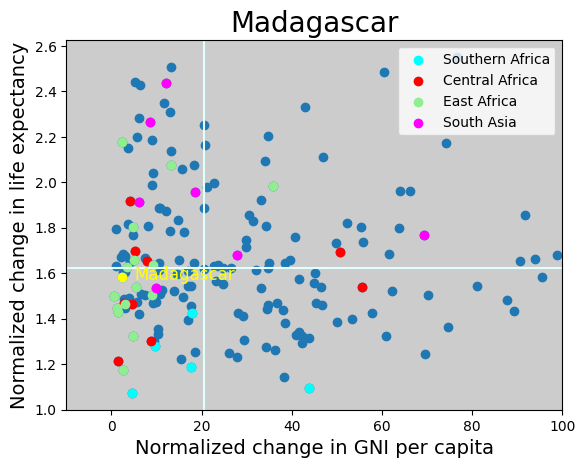

In [107]:
fig, ax= plt.subplots()

plt.style.use('default')
plt.scatter(x=df['norm_gni'], y= df['norm_le'])#, ax=ax)
plt.scatter(x=df[df['country'].isin(southern_africa)]['norm_gni'], 
            y= df[df['country'].isin(southern_africa)]['norm_le'], 
            color='cyan',
            label='Southern Africa')
plt.scatter(x=df[df['country'].isin(central_africa)]['norm_gni'], 
            y= df[df['country'].isin(central_africa)]['norm_le'], 
            color='red',
            label='Central Africa')
plt.scatter(x=df[df['country'].isin(east_africa)]['norm_gni'], 
            y= df[df['country'].isin(east_africa)]['norm_le'], 
            color='lightgreen', 
            label='East Africa')
plt.scatter(x=df[df['country'].isin(south_asia)]['norm_gni'], 
            y= df[df['country'].isin(south_asia)]['norm_le'], 
            color='magenta', 
            label='South Asia')
plt.scatter(x=df[df['country'].isin(['Madagascar'])]['norm_gni'], 
            y= df[df['country'].isin(['Madagascar'])]['norm_le'], 
            color='yellow')#,
            #label='Countries of Uncertain Region')

plt.annotate('Madagascar', xy= (2.85, 1.6), xytext= (5,1.57), color='yellow', size=12)

ax.axhline(y=df['norm_le'].median(), xmin=0, xmax=1, color='lightcyan')
ax.axvline(x=df['norm_gni'].median(), color='lightcyan')

ax.set_title('Madagascar', size=20)
ax.set_xlabel('Normalized change in GNI per capita', size=14)
ax.set_xlim(-10,100)
ax.set_ylabel('Normalized change in life expectancy', size=14)
ax.set_facecolor('0.8')

ax.legend();

fig.savefig('../images/madagascar.png')

plt.show()
plt.close(fig)

It seems pretty clear that Madagascar belongs with either East Africa or Central Africa.  It definitely does not fit with southern Africa.  However it is on the outer edges of the South Asia parameter space.  

# Conclusions

We need more data. Also more research into GNI per capita and exactly what that means.  I've been using it as approximately the average income in a country, but I also suspect the calculation is more complex than that.  (It is always complicated when trying to summarize an entire country, even a small one, in a single number.)

I also would like to include more of the in-between point and not just the initial and final points used in this analysis.  
This is too simplistic of an analysis, we need to look at more in-between points and not just initial and final points.

The normalized change in life expectancy from 1800 to 2100 is due to the introduction of modern medicine, this drastically increase life expectancy around the global.  The minimum value is `1.09`, so that population is, on average, living $109\%$ longer than they did in 1800.  This is a bit over doubling the population's lifespan.  

This means that modern medicine has improved life expectancy around the global.  There are well documented inequalities regarding access to and quality of medical care, but the average has improved drastically.  

The normalized GNI per capita has increased around the world as well.  But much less evenly.  

There are a few overperformers in both life expectancy and GNI per capita and a new underperformers.  As well as a few interesting outliers.

We were also able to classify a some of the countries with unclear regional affliations.  But not all of them.



### Moving Forward

In the future, I would like to include the 9 countries with significantly smaller life expectancy dataset.  Perhaps by including a normalized change per year? But that may make the interpretation too complex.  There is likely already a way to deal with this, so a different comparison may be more appropriate.  Further reading of the literature is needed in this area.  

I would also like to explore how evenly a country's people experienced these increases in life expectancy and GNI per capita.  There is properly some inequality, is that inequality increasing or decreasing?  Additional economic information would be ideal.  

Finally, I also would like to include pollution levels in the air and water as access to clean air and water improves one's quality of living.  And if we're looking at quality of life, I would also like to access to education and food security. I think there's already a significant number of people who have dedicated their entire careers to this data, so I will probably need to hire a large team to help me with this analysis!

I'm glad to see the world has greatly benefitted from modern medicine and improving GNI per capita (although how inflation fits in this, I don't know).  On average, the world is improving.  Our work is now to ensure that everyone has access to these improvements.